# Problem Statement

Aerofit, a leading brand in the fitness equipment industry, offers a diverse product range including treadmills, exercise bikes, gym equipment, and fitness accessories. To enhance revenue, we aim to provide actionable recommendations based on detailed insights gathered from the sales data. The dataset consists of three months of sales data.

- ***Identify Characteristics of the Target Audience:***
	- `Understand the demographics and purchasing behavior of customers for each type of treadmill offered by Aerofit`
	- `Create detailed customer profiles for each treadmill product`

- ***Perform Descriptive Analytics:***
	- `Generate two-way contingency tables for each treadmill product`
	- `Compute all conditional and marginal probabilities to gain insights into customer preferences and purchasing patterns`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv(r'F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Aerofit\Dataset\aerofit_treadmill.csv')

In [92]:
raw_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [93]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Inference:**
- `No null values in all the columns`
- `3 categorical and 5 numerical columns`

In [94]:
raw_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Inference:**
- `25% of users in the age range of 24 to 26`
- `Education, Usage and fitness seems to be integer and it requires detailed analysis`
- `More than 25% of users are having exactly 16 years of education`
- `25% of users expected to walk more than 115 miles`

In [95]:
raw_data.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**Inference:**
- `3 Unique products with KP281 being the highest sale`
- `Around 60% of users are partnered`

# Exploratory Data Analysis

In [96]:
plt.rcParams['figure.figsize'] = (12,6)

## UVA on Categorical column

In [97]:
def plot_count(df, col):
    plt.suptitle('Sales Quantity by ' + col)
    plt.subplot(1,2,1)
    sns.countplot(data = df, x = col)
    plt.subplot(1,2,2)
    plt.pie(df[col].value_counts(), labels = list(df[col].value_counts().index), autopct = '%0.1f%%')

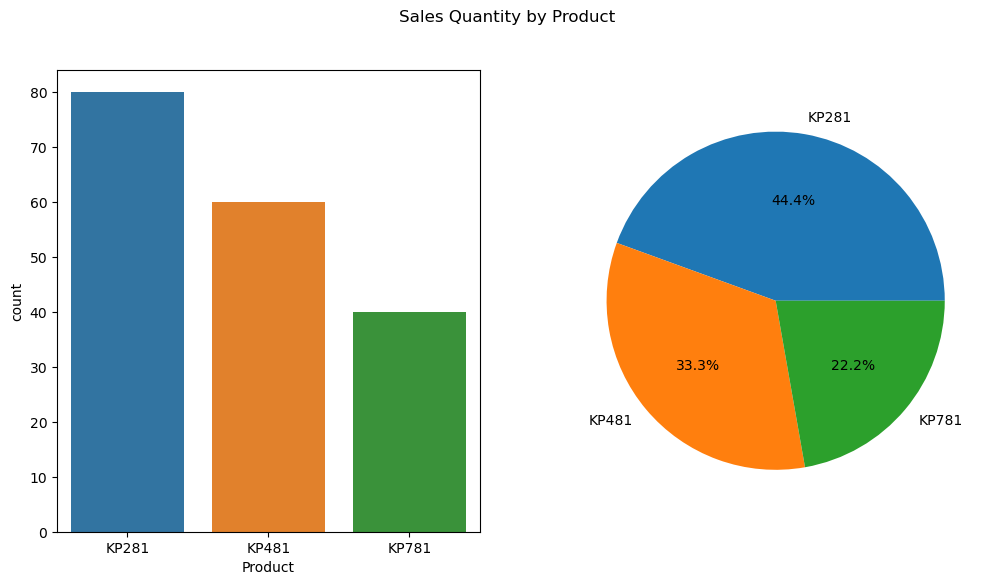

In [98]:
plot_count(raw_data, 'Product')

**Inference:**
- `KP281 has highest market share and KP781 being the lowest among other products`

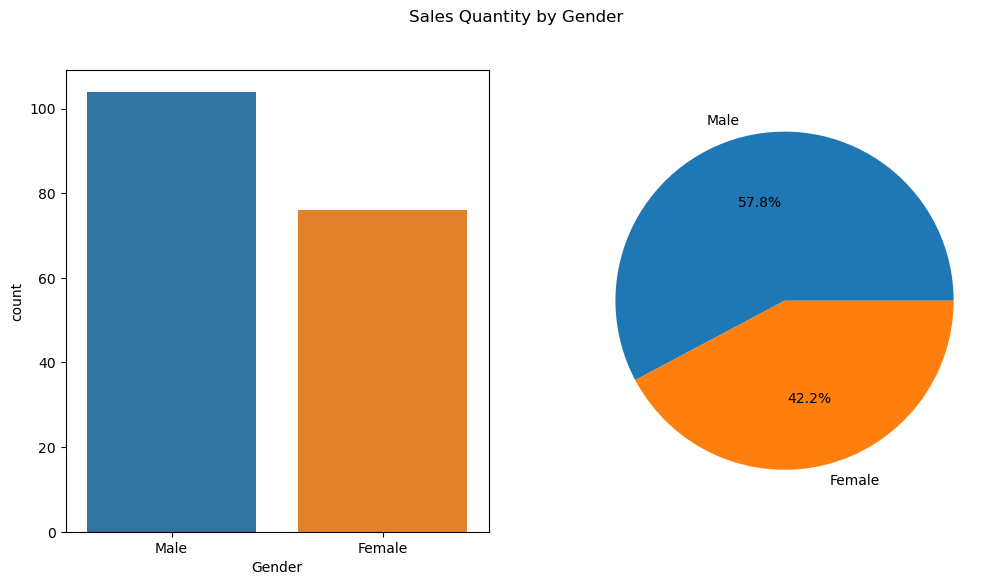

In [99]:
plot_count(raw_data, 'Gender')

**Inference:**
- `Male users made 57.8% of purchases`

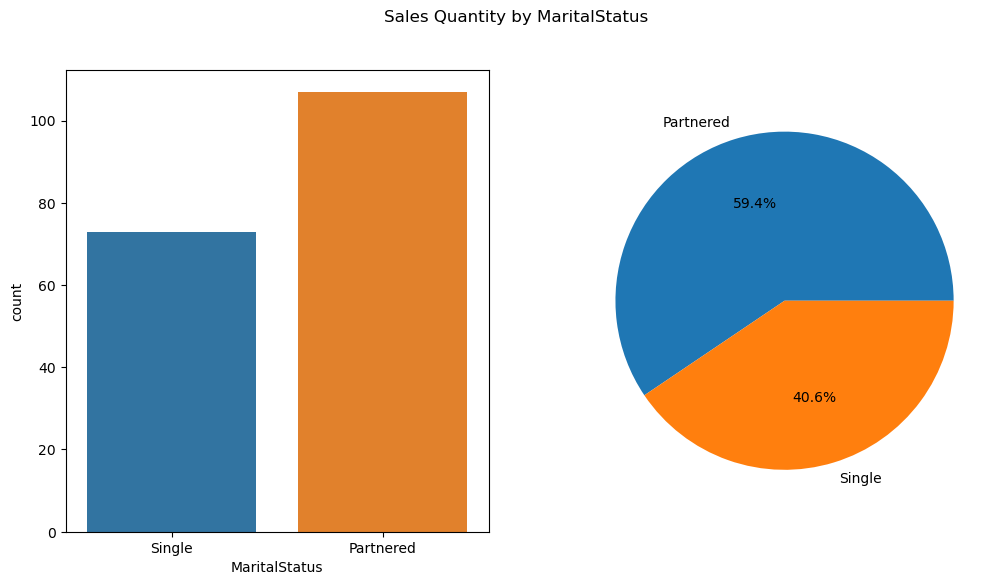

In [101]:
plot_count(raw_data, 'MaritalStatus')

**Inference:**
- `Around 60% of users are partnered`

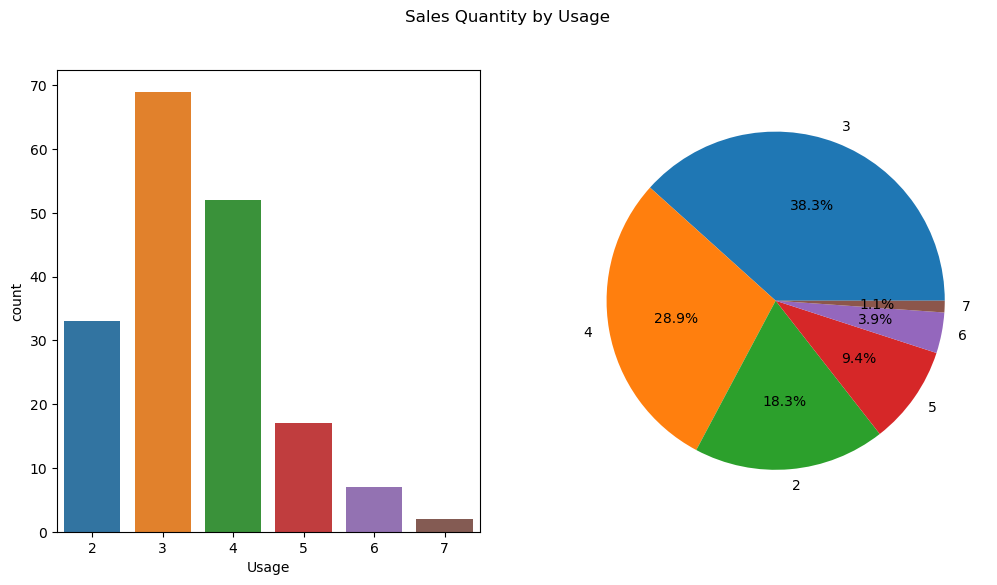

In [102]:
plot_count(raw_data, 'Usage')

**Inferece:**
- `Most of the purchases (~80%) are made by the users who expected to use the treadmill for 2-4 days a week`

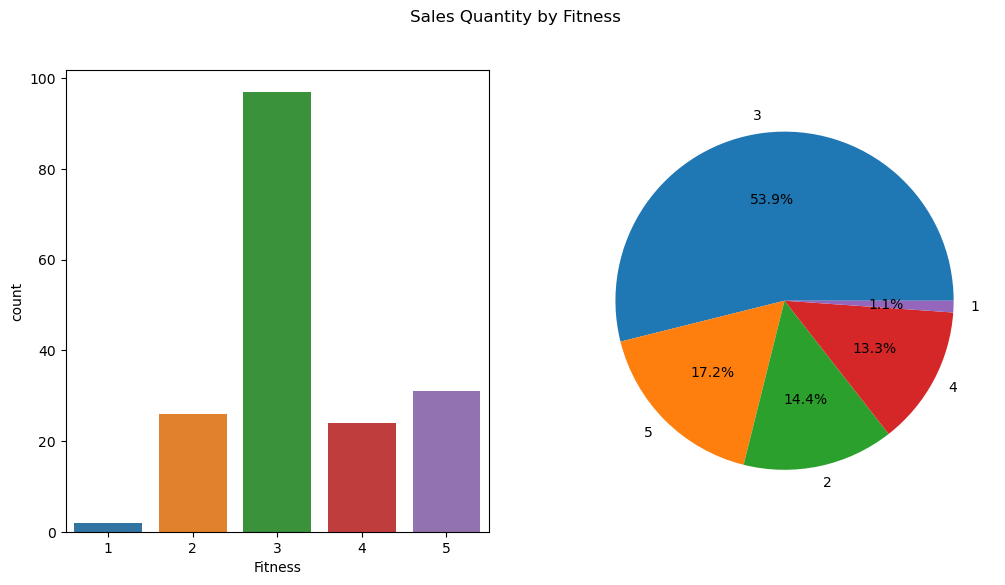

In [103]:
plot_count(raw_data, 'Fitness')

**Inference:**
- `Most of the purchases (~54%) are made by the users who rated themselves 3 (Medium)`

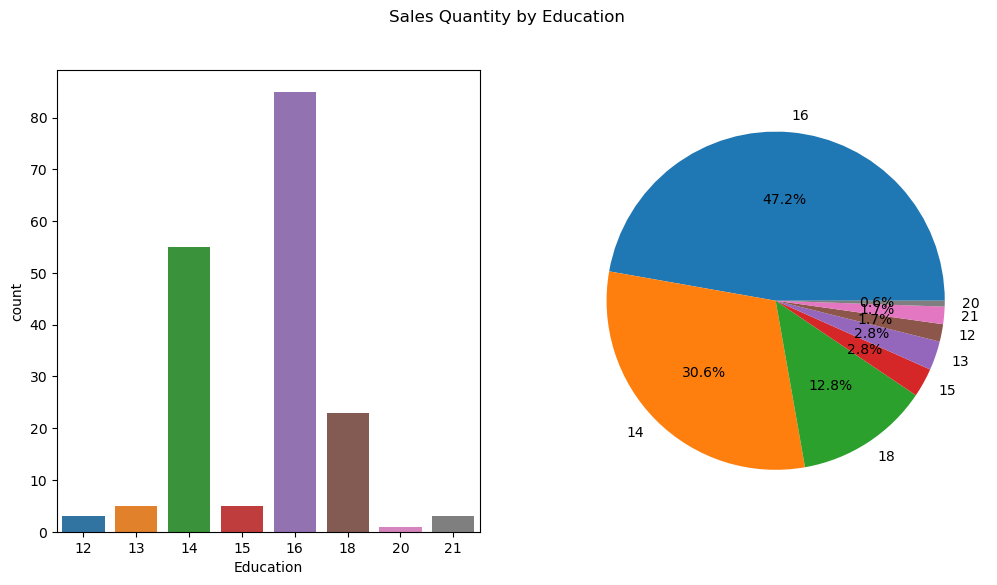

In [104]:
plot_count(raw_data, 'Education')

**Inference:**
- `Most of the purchases (~71%) are made by the users having 14 and 16 years of education`
- `Need further investigation on this part how it relates to the purchase of treadmill`

## UVA on Numerical columns

In [105]:
def plot_hist(df, col):
    plt.suptitle('Sales Quantity by ' + col)
    plt.subplot(1,2,1)
    sns.histplot(data = df, x = col)
    plt.subplot(1,2,2)
    sns.boxplot(data = df, y = col)
    plt.show()

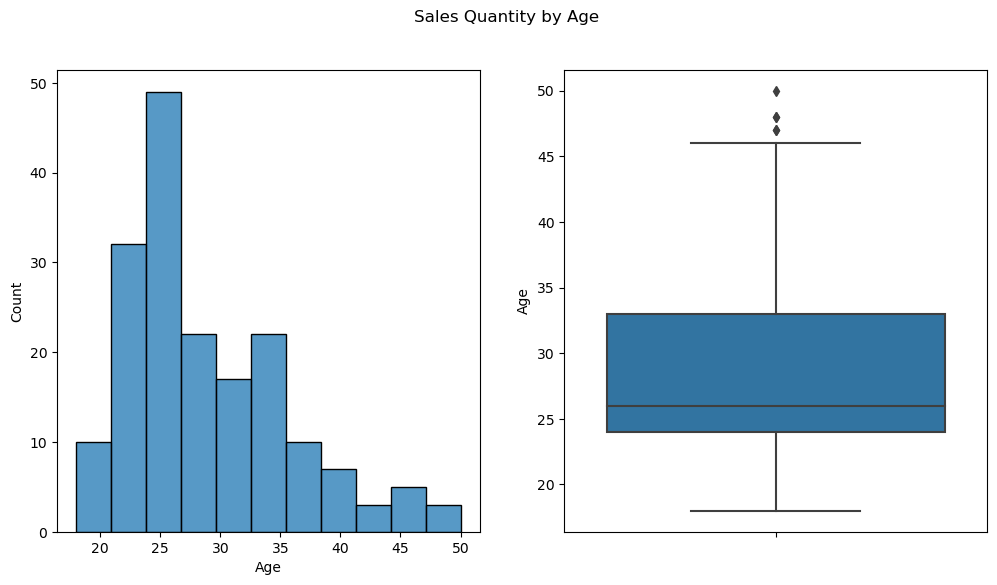

In [106]:
plot_hist(raw_data, 'Age')

**Inference:**
- `Most of the purchases (75%) are made by the users in the age group of 20 to 35`

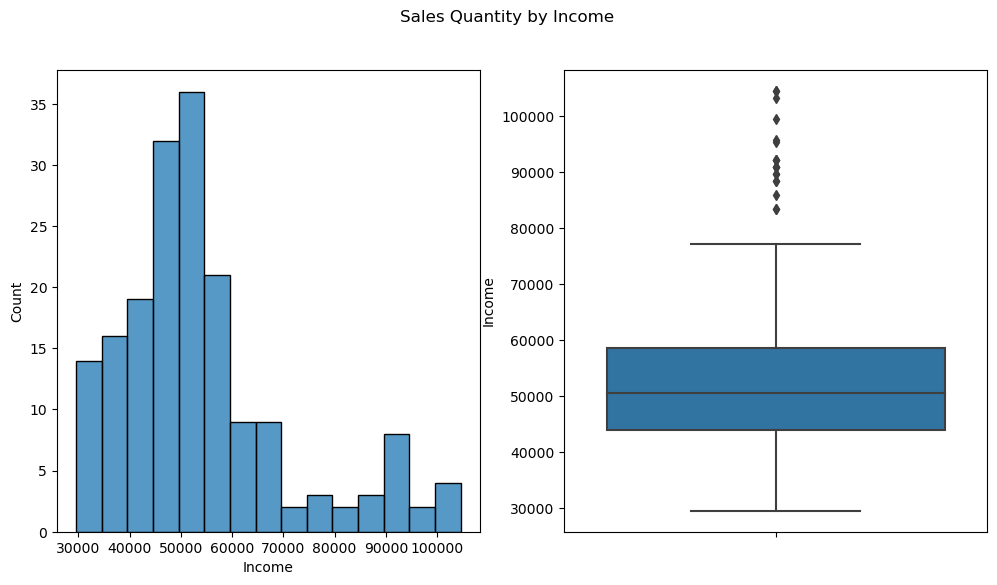

In [107]:
plot_hist(raw_data, 'Income')

**Inference:**
- `75% of the purchases are performed by users with income lesser than $60k`

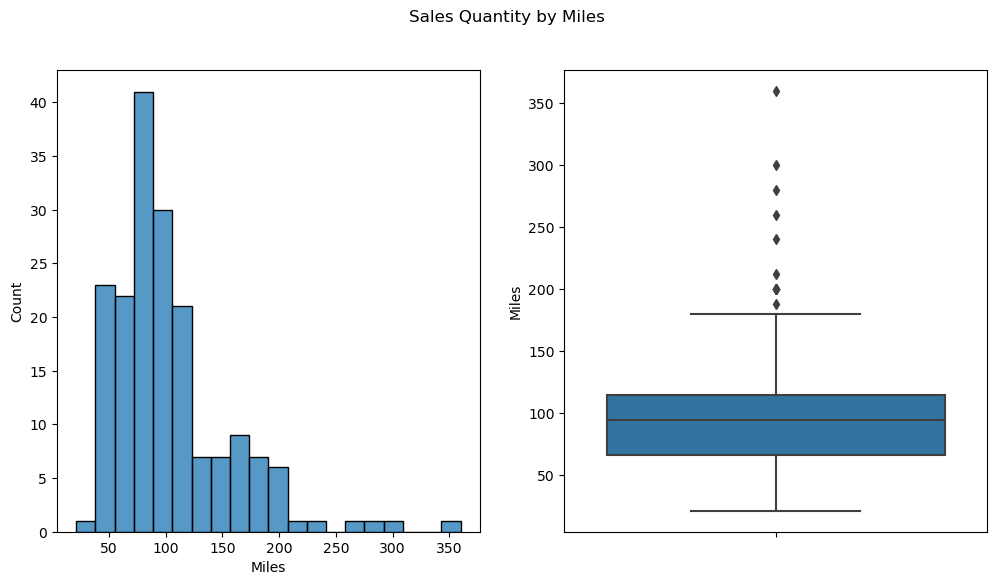

In [108]:
plot_hist(raw_data, 'Miles')

**Inference:**
- `Users who expected to run 50-100 miles showed the highest interest in purchasing the treadmill`

# Bivariate Analysis

<Axes: xlabel='Education', ylabel='count'>

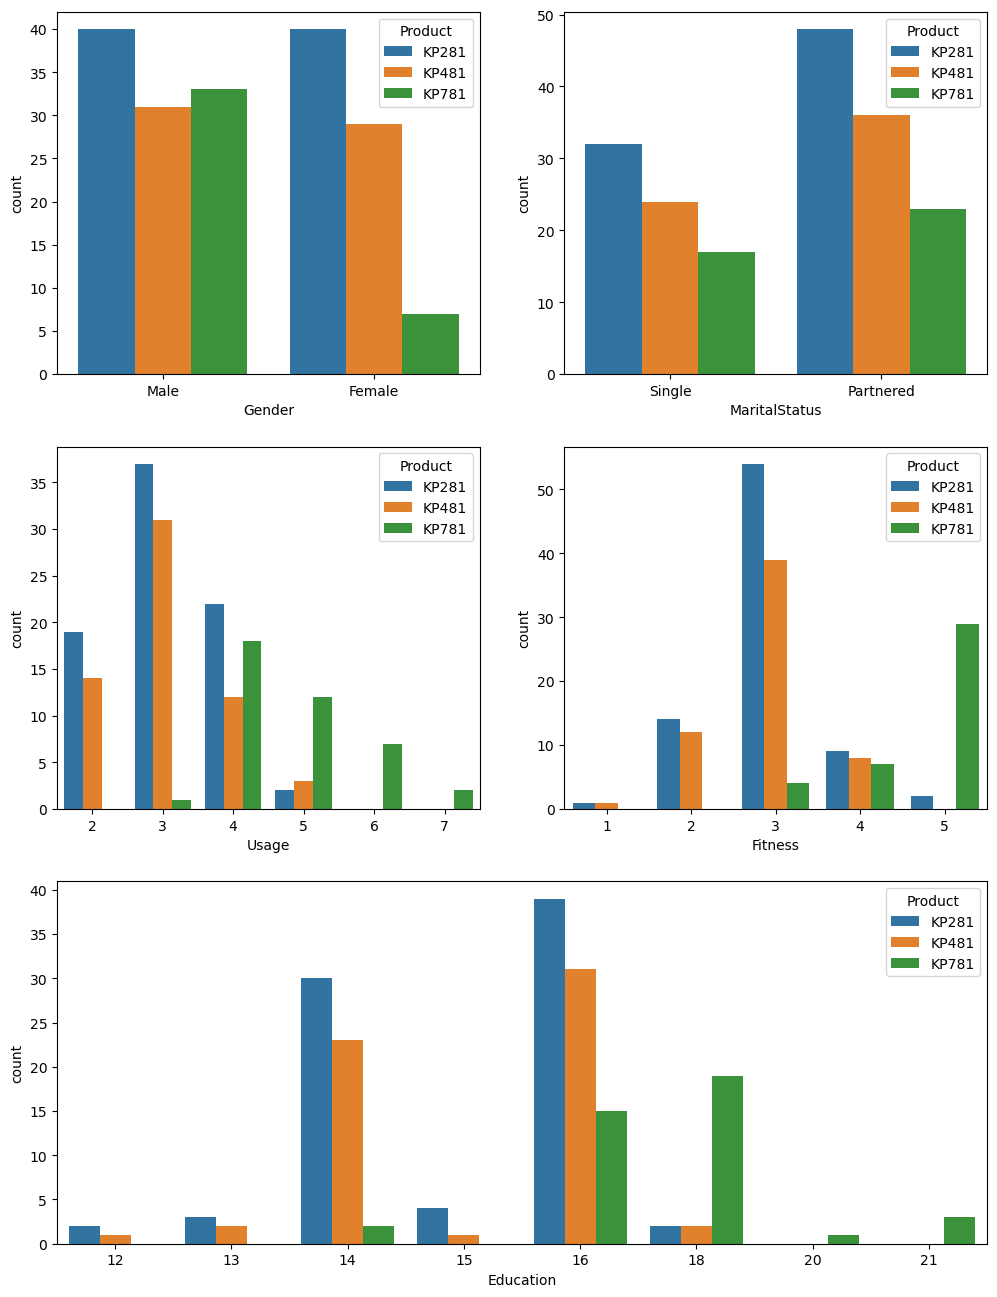

In [109]:
plt.figure(figsize=(12, 16))
plt.subplot(3,2,1)
sns.countplot(data = raw_data, hue = 'Product', x='Gender')
plt.subplot(3,2,2)
sns.countplot(data = raw_data, hue = 'Product', x='MaritalStatus')
plt.subplot(3,2,3)
sns.countplot(data = raw_data, hue = 'Product', x='Usage')
plt.subplot(3,2,4)
sns.countplot(data = raw_data, hue = 'Product', x='Fitness')
plt.subplot(3,1,3)
sns.countplot(data = raw_data, hue = 'Product', x='Education')

**Inference:**
- ***Product vs Gender:*** `Female shows very less interest in buying the product KP781`
- ***Product vs Martial Status:*** `Partnered users are highly interested in buying treadmill`
- ***Product vs Usage:*** `Users with high usage are more prone to buy KP781 and less usage prefers other 2 products`
- ***Product vs Fitness:*** `Medium fitness users (2-4) are much interested in buying treadmill predominantly and only High fitness users prefer KP781`
- ***Product vs Education:*** `Higher education group prefers product KP781`

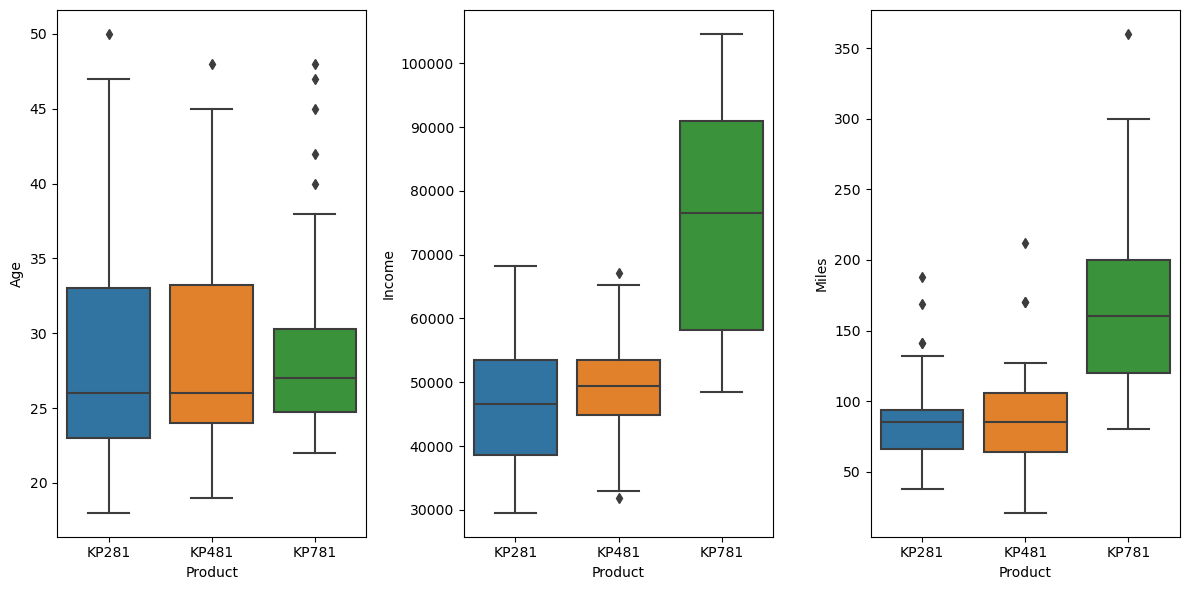

In [110]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
sns.boxplot(data = raw_data, x = 'Product', y='Age')
plt.subplot(1,3,2)
sns.boxplot(data = raw_data, x = 'Product', y='Income')
plt.subplot(1,3,3)
sns.boxplot(data = raw_data, x = 'Product', y='Miles')
plt.tight_layout()

**Inference:**
- ***Age vs Product:*** `The predominant users of the KP781 treadmill are in their 20s.`
- ***Income vs Product:*** `The purchase of the KP781 is dominated by higher-income users, indicating that it is not affordable for the lower-income group. In contrast, the KP481 falls into the medium price range, and the KP281 is more affordable for the lower-income group`
- ***Miles vs Product:*** `The KP781 is primarily purchased by users who run higher miles, suggesting it is preferred by heavy workout enthusiasts`

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


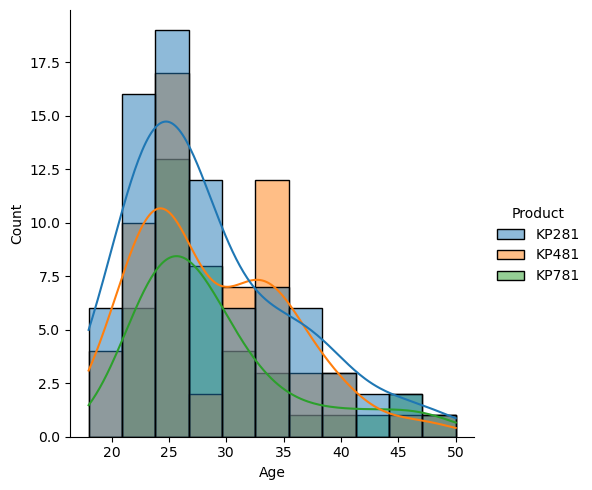

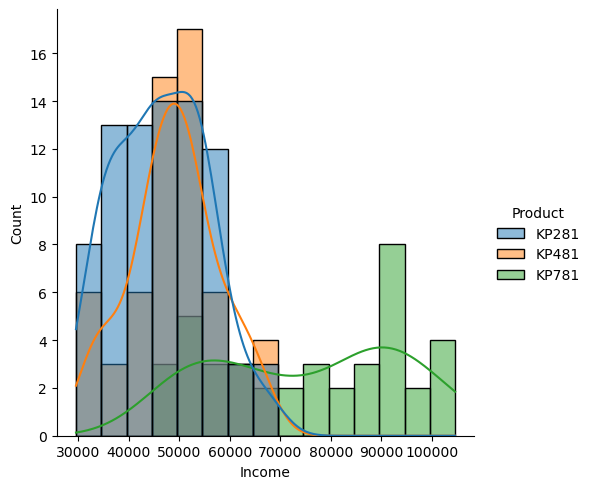

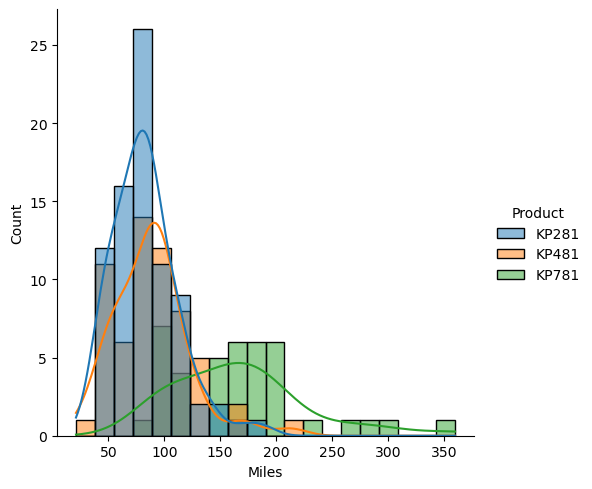

In [125]:
sns.displot(data = raw_data, x = 'Age', hue = 'Product', kde=True)
sns.displot(data = raw_data, x = 'Income', hue = 'Product', kde=True)
sns.displot(data = raw_data, x = 'Miles', hue = 'Product', kde=True)
plt.show()

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


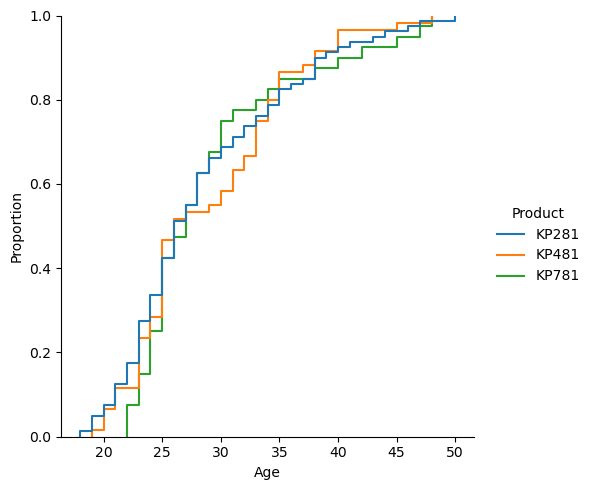

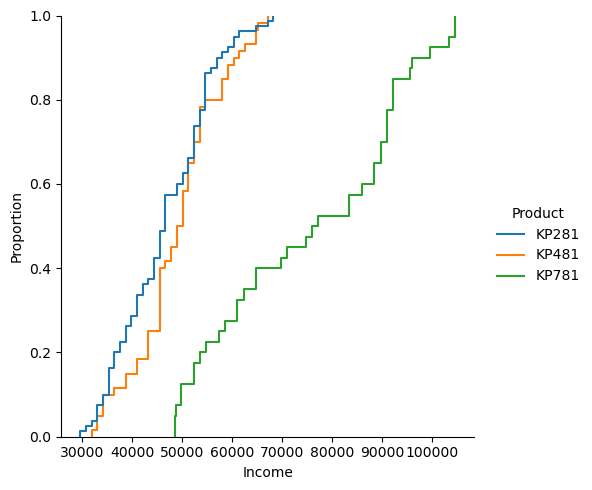

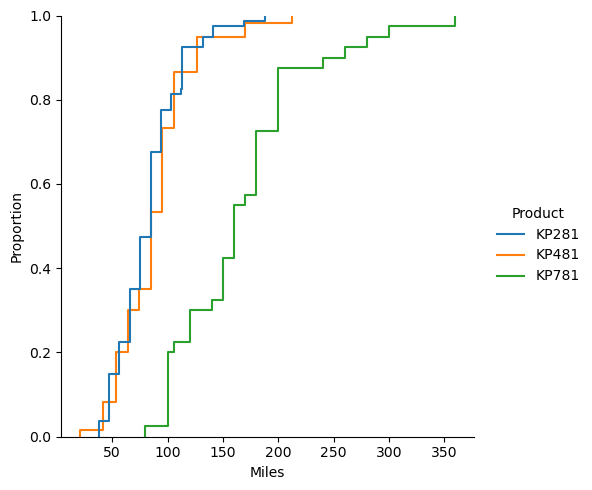

In [126]:
sns.displot(data = raw_data, x = 'Age', hue = 'Product', kind='ecdf')
sns.displot(data = raw_data, x = 'Income', hue = 'Product', kind='ecdf')
sns.displot(data = raw_data, x = 'Miles', hue = 'Product', kind='ecdf')

**Inference:**
- `KP281:`
    - `Predominantly Purchased by age group 20- 30`
    - `Mostly Purchased by income group $30k - $60k`
    - `Highly Purchased by users with expected miles in the range of 50 - 100`
- `KP481:`
    - `Predominantly Purchased by age group 20- 30`
    - `Mostly Purchased by income group $40k - $60k`
    - `Highly Purchased by users with expected miles in the range of 50 - 100`
- `KP781:`
    - `Predominantly Purchased by age group 20- 35`
    - `Mostly Purchased by income group $50k - $100k`
    - `Highly Purchased by users with expected miles in the range of 100 - 200`

# Multivariate Analysis

<Axes: xlabel='Gender', ylabel='Age'>

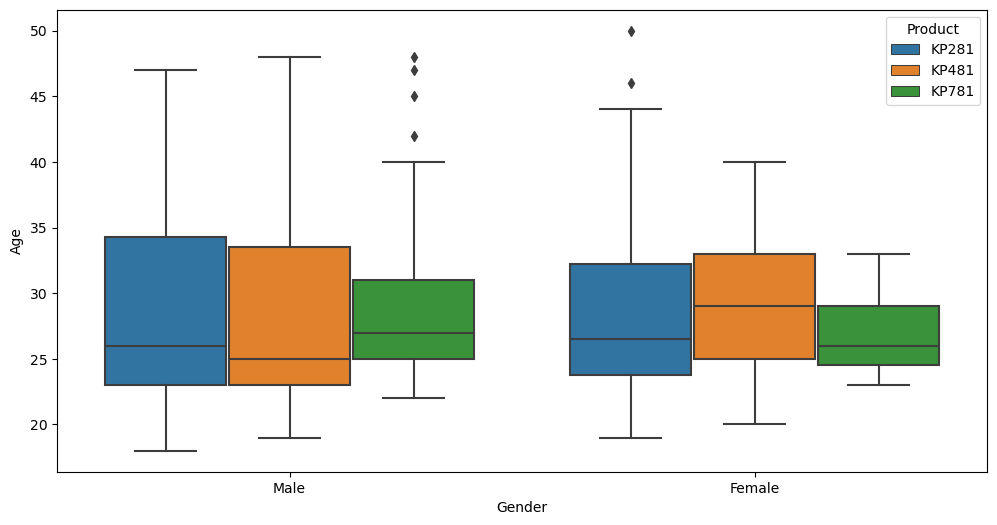

In [111]:
sns.boxplot(data=raw_data, y = 'Age', x = 'Gender', hue='Product')

**Inference:**
- `Median age of male interested in KP481 is lesser than other 2 products whereas it is vice versa for female users`
- `Some Outliers are detected`

<Axes: xlabel='Gender', ylabel='Income'>

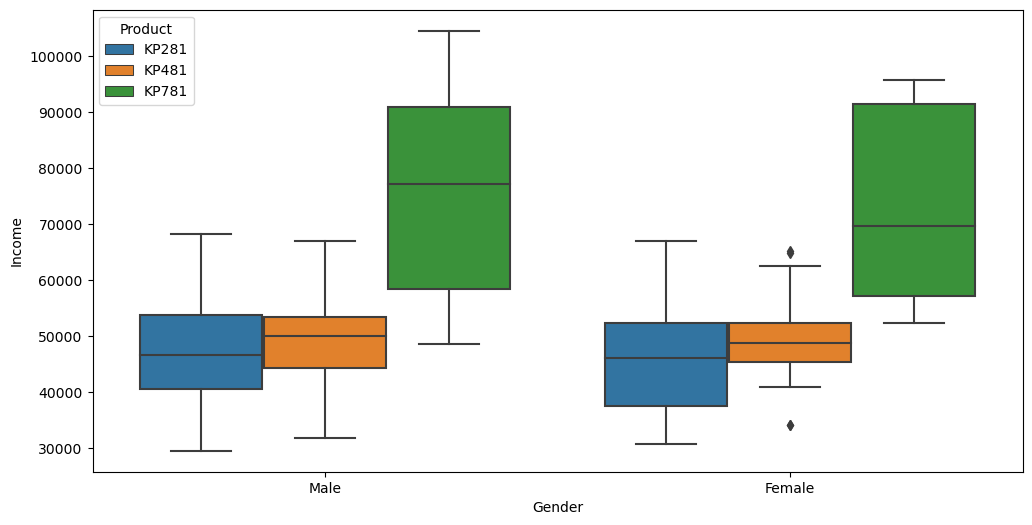

In [112]:
sns.boxplot(data=raw_data, y = 'Income', x = 'Gender', hue='Product')

**Inference:**
- `Some outliers are detected in female income data`

<Axes: xlabel='Gender', ylabel='Miles'>

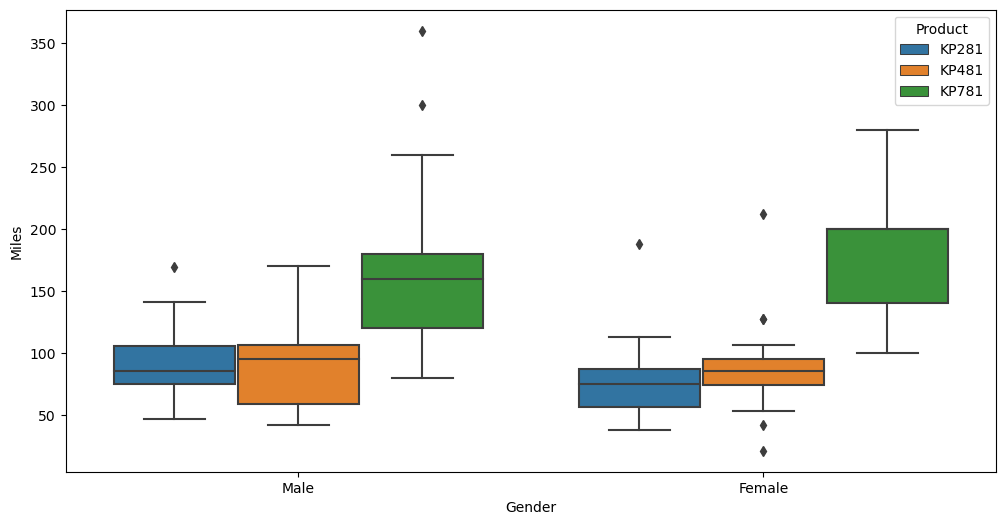

In [113]:
sns.boxplot(data=raw_data, y = 'Miles', x = 'Gender', hue='Product')

**Inference:**
- `Mean and Median are same for Female users buying product KP871`

<Axes: xlabel='MaritalStatus', ylabel='Age'>

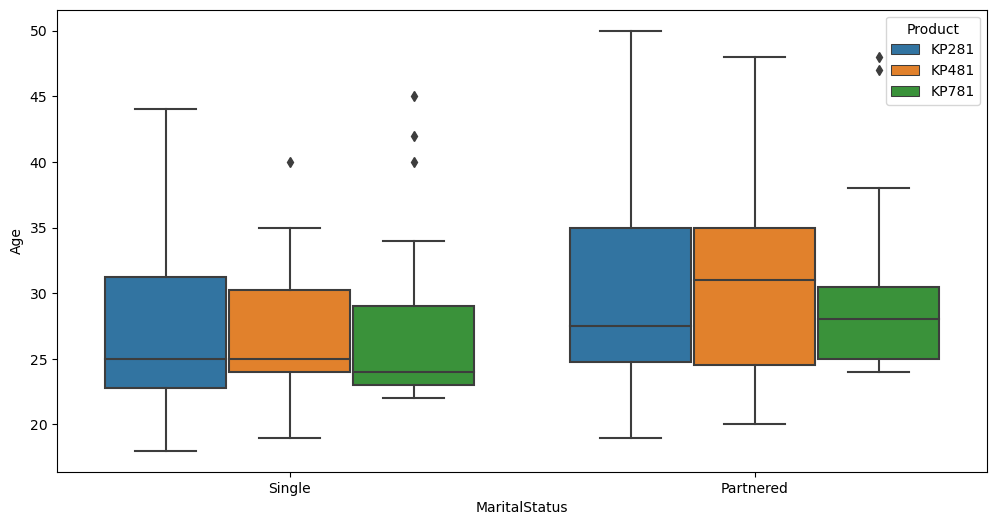

In [114]:
sns.boxplot(data=raw_data, y = 'Age', x = 'MaritalStatus', hue='Product')

**Inference:**
- `The partnered users who purchased the KP781 are within a narrower age range compared to the users of the other two products.`
- `It implies that the users might be newly wed or partnered`

<Axes: xlabel='Usage', ylabel='Age'>

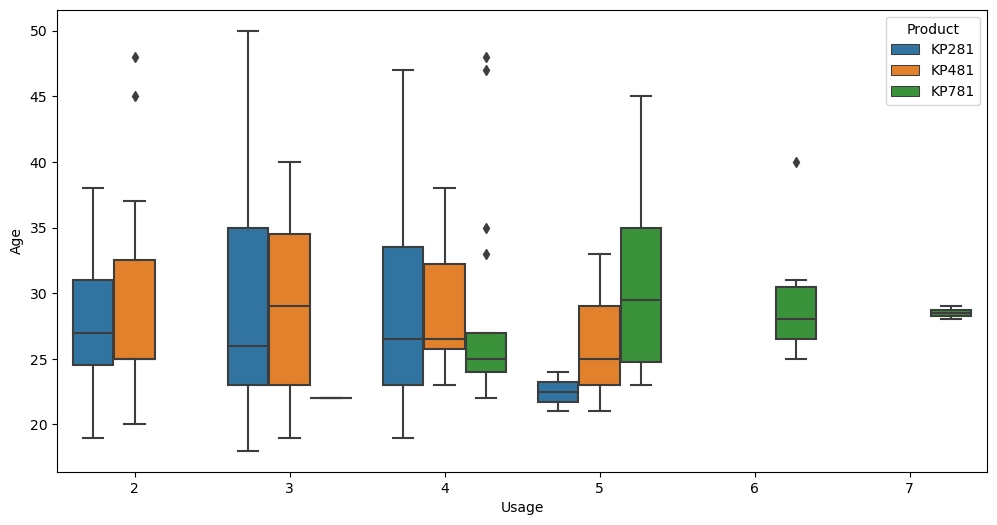

In [115]:
sns.boxplot(data=raw_data, y = 'Age', x = 'Usage', hue='Product')

**Inference:**
- `Preference of High usage users KP781 > KP481 > KP281`
- `Preference of Medium and Low usage users KP781 < KP481 ~ KP281`

<Axes: xlabel='Product', ylabel='Income'>

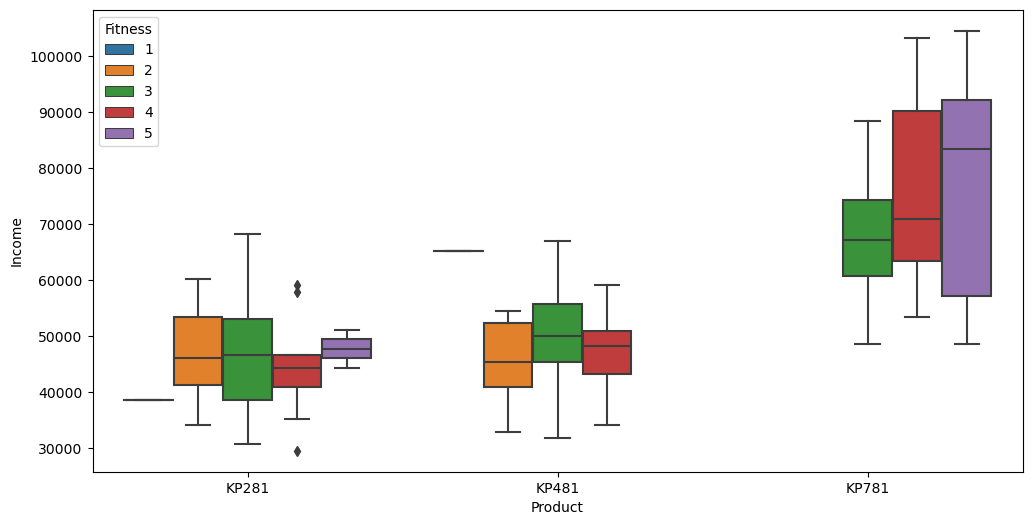

In [116]:
sns.boxplot(data=raw_data, y = 'Income', x = 'Product', hue='Fitness')

<Axes: >

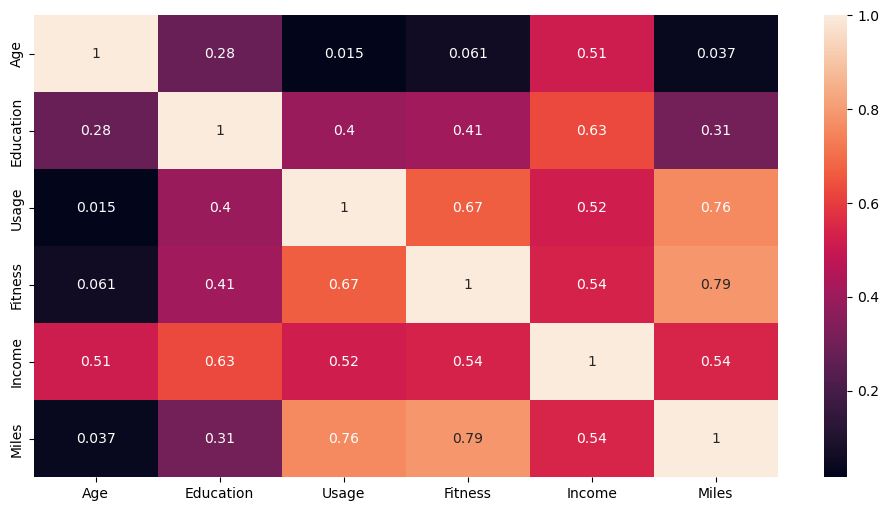

In [120]:
sns.heatmap(raw_data.drop(['Product', 'Gender', 'MaritalStatus'], axis=1).corr(), annot=True)

**Inference:**
- `Income is highly correlated with all the columns`
- `Miles is highly correlated with Usage and Fitness`
- `Fitness and Usage are highly correlated`
- `Age is less correlated with all the columns except Income`

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


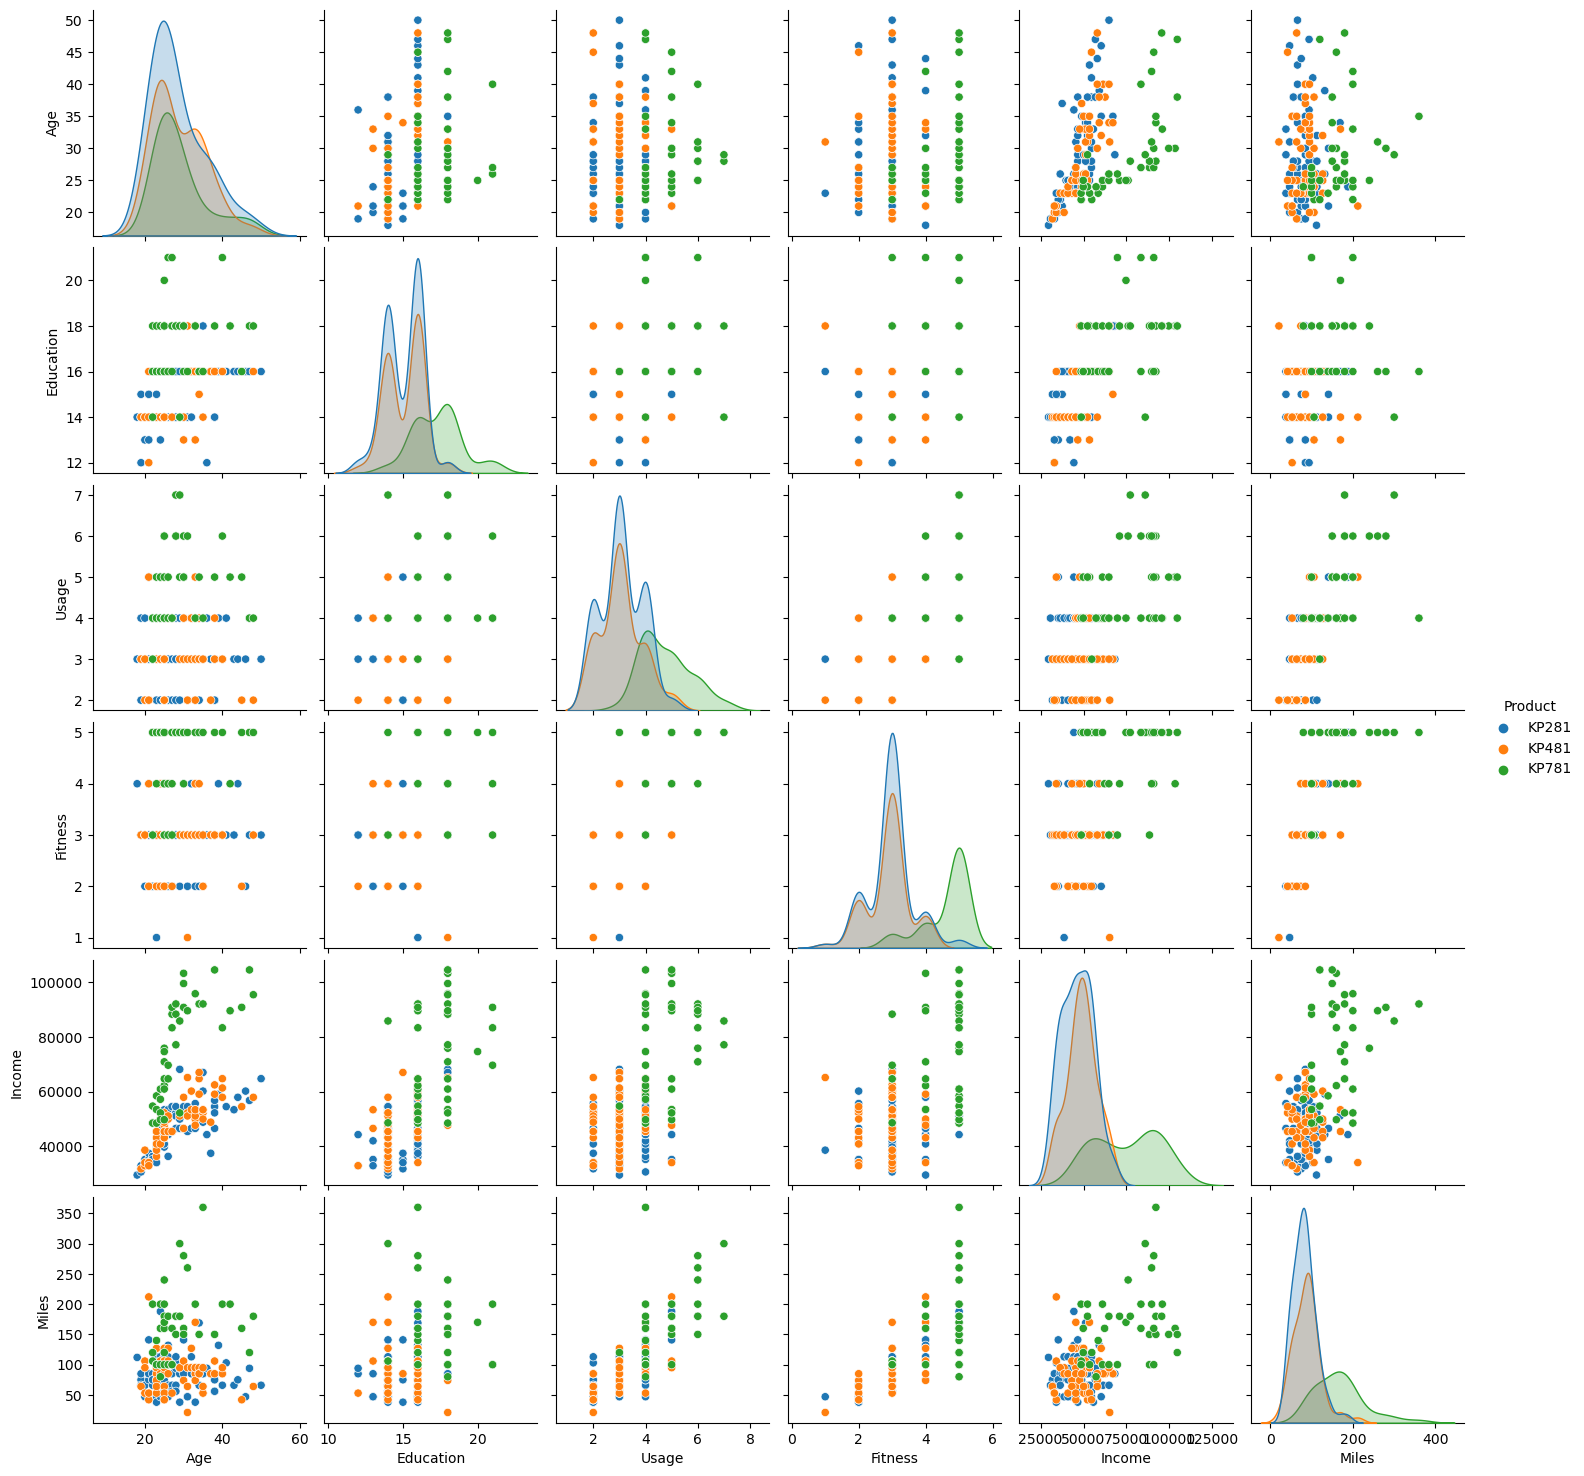

In [127]:
sns.pairplot(raw_data, hue='Product')

**Inference:**
- `High income group expects to walk more miles and rated themselves higher in fitness`
- `Higher income group contributes more for the purchase of KP781`
- `Most of the purchases of all the products are performed by users in 20's age group`
- `30's age group prefers KP481 compared to other age groups`
- `Higher education group prefers KP781`
- `Higher Fitness group prefers KP781`

# Conditional Probability with One Condition

## Gender and Product

In [121]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['Gender'], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Gender')
display(cp_df)

 Conditional Probability given Gender


Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


**Inference:**
- `Above table represents the conditional probability of buying an item (row) given gender (column)`
- `For Ex: Probability of buying KP281 given female is 0.526316`
- `Table infers that Female are more prone to buy products KP281 and KP481 than KP781 compared to male`

In [122]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['Gender'], margins = True, normalize='index')
print("\033[92m", 'Conditional Probability given Product')
display(cp_df)

 Conditional Probability given Product


Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


**Inference:**
- `Above table represents the conditional probability of being a gender for the given item`
- `For Ex: Probability of being Male given KP481 is bought, is 0.51667`
- `It indicates, both gender are almost equally likely to buy KP281 and KP481 products`

## Education and Product

In [41]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['Education'], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Education')
display(cp_df)

 Conditional Probability given Education


Education,12,13,14,15,16,18,20,21,All
Product,,,,,,,,,
KP281,0.666667,0.6,0.545455,0.8,0.458824,0.086957,0.0,0.0,0.444444
KP481,0.333333,0.4,0.418182,0.2,0.364706,0.086957,0.0,0.0,0.333333
KP781,0.000000,0.0,0.036364,0.0,0.176471,0.826087,1.0,1.0,0.222222


**Inference:**
- `Above table represents the conditional probability of buying an item (row) given educational years (column)`
- `For Ex: Probability of buying KP281 given educational years as 12, is 0.66667`
- `Table infers that users with 18 and more years of education tend buy product KP781 than KP281 and KP481`

In [42]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['Education'], margins = True, normalize='index')
print("\033[92m", 'Conditional Probability given Product')
display(cp_df)

 Conditional Probability given Product


Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,0.025000,0.037500,0.375000,0.050000,0.487500,0.025000,0.000000,0.000000
KP481,0.016667,0.033333,0.383333,0.016667,0.516667,0.033333,0.000000,0.000000
KP781,0.000000,0.000000,0.050000,0.000000,0.375000,0.475000,0.025000,0.075000
All,0.016667,0.027778,0.305556,0.027778,0.472222,0.127778,0.005556,0.016667


**Inference:**
- `Above table represents the conditional probability of having respective educational year for the purchase of given item`
- `For Ex: Probability of having educational years of 16, given KP481 is bought, is 0.51667`
- `It indicates, if an item is bought user is most likely to be having the educational year of 16`

## Marital Status and Product

In [44]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['MaritalStatus'], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Marital Status')
display(cp_df)

 Conditional Probability given Marital Status


MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


**Inference:**
- `Above table represents the conditional probability of buying an item (row) given Marital Status (column)`
- `For Ex: Probability of buying KP281 given Partnered is 0.448598`

In [45]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['MaritalStatus'], margins = True, normalize='index')
print("\033[92m", 'Conditional Probability given Product')
display(cp_df)

 Conditional Probability given Product


MaritalStatus,Partnered,Single
Product,,
KP281,0.600000,0.400000
KP481,0.600000,0.400000
KP781,0.575000,0.425000
All,0.594444,0.405556


**Inference:**
- `Above table represents the conditional probability of being in Marital status for the purchase of given item`
- `For Ex: Probability of being Partnered given KP481 is bought, is 0.6`
- `It indicates, if an item is bought the user is slightly more likely to be partnered`

## Usage and Product

In [47]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['Usage'], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Usage')
display(cp_df)

 Conditional Probability given Usage


Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0,0.444444
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0,0.333333
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0,0.222222


**Inference:**
- `Above table represents the conditional probability of buying an item (row) given weekly usage (column)`
- `For Ex: Probability of buying KP281 given weekly usage of 3 is 0.536232`
- `Table infers that if the weekly usage is less than or 4, the user is more likely to buy KP281 and KP481`
- `Especially if the usage is 6 or 7 days a week, the user will definitely go with KP781 (100% probability)`

In [48]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['Usage'], margins = True, normalize='index')
print("\033[92m", 'Conditional Probability given Product')
display(cp_df)

 Conditional Probability given Product


Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.237500,0.462500,0.275000,0.025000,0.000000,0.000000
KP481,0.233333,0.516667,0.200000,0.050000,0.000000,0.000000
KP781,0.000000,0.025000,0.450000,0.300000,0.175000,0.050000
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111


**Inference:**
- `Above table represents the conditional probability of having weekly usage given an item is purchased`
- `For Ex: Probability of having weekly usage of 3 given KP481 is bought, is 0.51667`
- `It indicates, if a user purchased KP281 and KP481 products then the user likely to be using it for 3 - 4 days a week`

## Fitness and Product

In [49]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['Fitness'], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Fitness')
display(cp_df)

 Conditional Probability given Fitness


Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516,0.444444
KP481,0.5,0.461538,0.402062,0.333333,0.000000,0.333333
KP781,0.0,0.000000,0.041237,0.291667,0.935484,0.222222


**Inference:**
- `Above table represents the conditional probability of buying an item (row) given fitness (column)`
- `For Ex: Probability of buying KP281 given medium fitness (3) is 0.556701`
- `Table infers that if the rated fitness of user is less than 4, the user is highly likely to purchase products KP281 and KP481`
- `If the user is rated a high fitness level (5), the user most likely purchase the product KP781`

In [50]:
cp_df = pd.crosstab(raw_data['Product'], columns = raw_data['Fitness'], margins = True, normalize='index')
print("\033[92m", 'Conditional Probability given Product')
display(cp_df)

 Conditional Probability given Product


Fitness,1,2,3,4,5
Product,,,,,
KP281,0.012500,0.175000,0.675000,0.112500,0.025000
KP481,0.016667,0.200000,0.650000,0.133333,0.000000
KP781,0.000000,0.000000,0.100000,0.175000,0.725000
All,0.011111,0.144444,0.538889,0.133333,0.172222


**Inference:**
- `Above table represents the conditional probability of having a fitness level for the given item purchased`
- `For Ex: Probability of having fitness level 3 given KP481 is bought, is 0.65`
- `It indicates, if a user purchase products KP281 or KP481, the user is highly likely to be having a fitness of 3`
- `if a user purchase products KP781, the user is very highly likely to be having a fitness of 5`

# Conditional Probability with 2 Conditions

## Product, Gender and Marital Status

In [72]:
cp_df = pd.crosstab(raw_data['Product'], columns = [raw_data['Gender'], raw_data['MaritalStatus']], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Gender and Marital Status')
display(cp_df)

 Conditional Probability given Fitness


Gender           Female                Male                 All
MaritalStatus Partnered    Single Partnered    Single          
Product                                                        
KP281          0.586957  0.433333  0.344262  0.441860  0.444444
KP481          0.326087  0.466667  0.344262  0.232558  0.333333
KP781          0.086957  0.100000  0.311475  0.325581  0.222222

**Inference:**
- `Above table represents the conditional probability of buying an item (row) given Gender and Marital Status (column)`
- `For Ex: Probability of buying KP281 given Female and Partnered is 0.5869`
- `Table infers that Female Partnered and Male Single are highly likely to make a purchase of KP281`    

In [75]:
cp_df = pd.crosstab(raw_data['Product'], columns = [raw_data['Gender'], raw_data['MaritalStatus']], margins = True, normalize='index')
print("\033[92m", 'Conditional Probability given Product')
display(cp_df)

 Conditional Probability given Product


Gender           Female                Male          
MaritalStatus Partnered    Single Partnered    Single
Product                                              
KP281          0.337500  0.162500  0.262500  0.237500
KP481          0.250000  0.233333  0.350000  0.166667
KP781          0.100000  0.075000  0.475000  0.350000
All            0.255556  0.166667  0.338889  0.238889

**Inference:**
- `Above table represents the conditional probability of Gender and Marital Status for the given item purchased`
- `For Ex: Probability of being Female and Partnered given KP481 is purchased, is 0.3375`
- `It indicates, if a user purchase products KP781 or KP481, the user is highly likely to be Male and Partnered`
- `if a user purchase products KP281, the user is very highly likely to be Female and Partnered`

## Product, Gender and Usage

In [78]:
cp_df = pd.crosstab(raw_data['Product'], columns = [raw_data['Gender'], raw_data['Usage']], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Gender and Usage')
display(cp_df)

 Conditional Probability given Gender and Usage


Gender  Female                                         Male            \
Usage        2         3         4         5    6         2         3   
Product                                                                 
KP281     0.65  0.575758  0.500000  0.142857  0.0  0.461538  0.500000   
KP481     0.35  0.424242  0.357143  0.428571  0.0  0.538462  0.472222   
KP781     0.00  0.000000  0.142857  0.428571  1.0  0.000000  0.027778   

Gender                                 All  
Usage           4    5    6    7            
Product                                     
KP281    0.394737  0.1  0.0  0.0  0.444444  
KP481    0.184211  0.0  0.0  0.0  0.333333  
KP781    0.421053  0.9  1.0  1.0  0.222222

**Inference:**
- `Above table represents the conditional probability of buying an item (row) given Gender and Usage per week (column)`
- `Table infers,`
    - `Female with usage of 2,3, 4 are highly likely to make a purchase of KP281 and with usage of 6 makes a purchase of KP781`
    - `Male with all usages are most likely distributed between atleast 2 products except with usage of >4`
    

## Product, Gender and Education

In [79]:
cp_df = pd.crosstab(raw_data['Product'], columns = [raw_data['Gender'], raw_data['Education']], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Gender and Education')
display(cp_df)

 Conditional Probability given Gender and Education


Gender    Female                                         Male              \
Education     13   14   15        16        18   21        12    13    14   
Product                                                                     
KP281        0.0  0.6  1.0  0.542857  0.142857  0.0  0.666667  0.75  0.48   
KP481        1.0  0.4  0.0  0.400000  0.285714  0.0  0.333333  0.25  0.44   
KP781        0.0  0.0  0.0  0.057143  0.571429  1.0  0.000000  0.00  0.08   

Gender                                            All  
Education        15    16      18   20   21            
Product                                                
KP281      0.666667  0.40  0.0625  0.0  0.0  0.444444  
KP481      0.333333  0.34  0.0000  0.0  0.0  0.333333  
KP781      0.000000  0.26  0.9375  1.0  1.0  0.222222

**Inference:**
- `Above table represents the conditional probability of buying an item (row) given Gender and Education in years (column)`
- `Table infers,`
    - `Both Male & Female with Educations years <16 are highly likely to make a purchase of KP281`
    - `Both Male & Female with Educations years >16 are highly likely to make a purchase of KP781`

## Product, Gender and Fitness

In [80]:
cp_df = pd.crosstab(raw_data['Product'], columns = [raw_data['Gender'], raw_data['Fitness']], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Gender and Fitness')
display(cp_df)

 Conditional Probability given Gender and Fitness


Gender  Female                                   Male                        \
Fitness      1      2         3      4         5    1    2         3      4   
Product                                                                       
KP281      0.0  0.625  0.577778  0.375  0.166667  1.0  0.4  0.538462  0.375   
KP481      1.0  0.375  0.400000  0.500  0.000000  0.0  0.6  0.403846  0.250   
KP781      0.0  0.000  0.022222  0.125  0.833333  0.0  0.0  0.057692  0.375   

Gender              All  
Fitness     5            
Product                  
KP281    0.04  0.444444  
KP481    0.00  0.333333  
KP781    0.96  0.222222

**Inference:**
- `Both Male and Female Medium fitness users are inclined towards KP281 and KP481`

In [82]:
cp_df = pd.crosstab(raw_data['Product'], columns = [raw_data['Gender'], raw_data['MaritalStatus'], raw_data['Fitness']], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Gender and Fitness')
display(cp_df)

 Conditional Probability given Gender and Fitness


Gender           Female                                                      \
MaritalStatus Partnered                Single                                 
Fitness               2    3    4    5      1         2         3         4   
Product                                                                       
KP281          0.777778  0.6  0.5  0.2    0.0  0.428571  0.533333  0.333333   
KP481          0.222222  0.4  0.5  0.0    1.0  0.571429  0.400000  0.500000   
KP781          0.000000  0.0  0.0  0.8    0.0  0.000000  0.066667  0.166667   

Gender                  Male                                                  \
MaritalStatus      Partnered                                    Single         
Fitness          5         1         2         3         4    5      2     3   
Product                                                                        
KP281          0.0       1.0  0.444444  0.481481  0.272727  0.0    0.0  0.60   
KP481          0.0       0.0  0.555556  0.481481  0.272727  0.0    1.0  0.32   
KP781          1.0       0.0  0.000000  0.037037  0.454545  1.0    0.0  0.08   

Gender                             All  
MaritalStatus                           
Fitness          4         5            
Product                                 
KP281          0.6  0.083333  0.444444  
KP481          0.2  0.000000  0.333333  
KP781          0.2  0.916667  0.222222

**Inference:**
- `Both Single Male & Female, with lowest fitness prefers KP481 and Partnered Male & Female, with lowest fitness prefers KP281`

In [83]:
cp_df = pd.crosstab(raw_data['Product'], columns = [raw_data['Gender'], raw_data['MaritalStatus'], raw_data['Usage']], margins = True, normalize='columns')
print("\033[92m", 'Conditional Probability given Gender and Fitness')
display(cp_df)

 Conditional Probability given Gender and Fitness


Gender           Female                                                    \
MaritalStatus Partnered                                  Single             
Usage                 2         3         4    5    6         2         3   
Product                                                                     
KP281          0.692308  0.736842  0.428571  0.2  0.0  0.571429  0.357143   
KP481          0.307692  0.263158  0.428571  0.6  0.0  0.428571  0.642857   
KP781          0.000000  0.000000  0.142857  0.2  1.0  0.000000  0.000000   

Gender                            Male  ...                                  \
MaritalStatus                Partnered  ...                          Single   
Usage                 4    5         2  ...         4    5    6    7      2   
Product                                 ...                                   
KP281          0.571429  0.0  0.333333  ...  0.409091  0.0  0.0  0.0   0.75   
KP481          0.285714  0.0  0.666667  ...  0.136364  0.0  0.0  0.0   0.25   
KP781          0.142857  1.0  0.000000  ...  0.454545  1.0  1.0  1.0   0.00   

Gender                                              All  
MaritalStatus                                            
Usage                 3      4         5    6            
Product                                                  
KP281          0.600000  0.375  0.166667  0.0  0.444444  
KP481          0.333333  0.250  0.000000  0.0  0.333333  
KP781          0.066667  0.375  0.833333  1.0  0.222222  

[3 rows x 21 columns]

# Business Insights and Recommendations

***Female Users:***
`Female users have shown less interest in purchasing the KP781 product, regardless of income or other parameters. Offering them an additional discount on Women's Day could increase the likelihood of purchase`

***Partnered Users:***
`Partnered users demonstrate a higher interest in buying the treadmill. Focusing advertisements on newlyweds or partnered users can help boost sales.`

***Higher Income Partnered Users:***
`Partnered users in the higher income group purchasing the KP781 fall within a narrower age range, implying that newly partnered users are highly likely to make a purchase. Targeting these customers with discounts or promotions could be effective.`

***High Usage Users:***
`The KP781 can be recommended to users with higher usage per week, as they are more likely to make a purchase.`

# Prepared By Muthukumar.G